## NSRI

In [1]:
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas



diff = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Test_Ship.txt", sep = "\t")

tset = "/Users/hart-davis/Desktop/Scripts/Ship_example.nc"
ts = netCDF4.Dataset(tset)

lon = ts.variables["lon"][:,:]
lat = ts.variables["lat"][:,:]
date = ts.variables["time"][0]
d = date - 630720000
a = (d.data-d.data[0])/3600/24
a = np.array(a)

mlon = diff.Lon.values
mlat = diff.Mlat.values

nlon = diff.Lon.values
nlat = diff.Nlat.values

dlon = [20.04095]
dlat = [-35.5186455861]
silon = [25.6981]
silat = [-35.238429]
slon = lon[0]
slat = lat[0]

m = Basemap(projection = "merc", resolution="i",llcrnrlon = 15, 
            llcrnrlat = -43, urcrnrlon = 30, urcrnrlat = -30,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')
#m.pcolor(lonData, latData, U, V)
#cbar = m.colorbar()
#cbar.ax.set_ylabel('Current speed in ' + units)
si1,si2 = m(silon,silat)
s1,s2 = m(lon,lat)
a1,a2 = m(nlon,nlat)
b1,b2 = m(mlon,mlat)
f1,f2 = m(dlon,dlat)

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lonnn = nc.variables["lon"][:]
lattt = nc.variables["lat"][:]

xx, yy = m(*np.meshgrid(lonnn,lattt))

#latdata, londata = np.meshgrid(latData,lonData)
#latD, lonD = m(latdata, londata)
#im1 = m.quiver(lonData,latData,U,V,cmap=plt.cm.jet)
m.drawcoastlines()

m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

#m.scatter(b1,b2,10,marker = ".", color="black",alpha = 1)
m.scatter(si1,si2,200,marker = "*", color="orange",alpha = 1,zorder=4)

for x in range(0,len(lon)):
    at = m.scatter(s1[x,:],s2[x,:],0.1, c=a,cmap='jet', marker = ".", alpha = 1,zorder=3)

globfiles = "/Users/hart-davis/Desktop/Scripts/GlobCurrent_Daily/20080120-GLOBCURRENT-L4-CUReul_15m-ALT_SUM-v03.0-fv01.0.nc"

nc = netCDF4.Dataset(globfiles)

u = nc.variables["eastward_eulerian_current_velocity"][:,:]
v = nc.variables["northward_eulerian_current_velocity"][:,:]
ssh = u + v
loni = nc.variables["lon"][:]
lati = nc.variables["lat"][:]
xx, yy = m(*np.meshgrid(loni,lati))

m.streamplot(xx,yy,u,v,density=2, color="black", linewidth=0.5)    
m.scatter(f1,f2,200,marker = "*", color="black",alpha = 1,zorder=4)
cntour = m.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.1)
cbar = plt.colorbar(at)
cbar.set_label("Time in Days")
plt.title("(a)")

plt.show()

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/hart-davis/anaconda2/lib/python2.7/site

ValueError: 'u' and 'v' must be of shape 'Grid(x,y)'

In [ ]:
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas
import matplotlib as mpl
import matplotlib.cm as cma


diff = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Test_Ship.txt", sep = "\t")

tset = "/Users/hart-davis/Desktop/Scripts/Ship_example2.nc"
ts = netCDF4.Dataset(tset)

lon = diff.Lon.values
lat = diff.Lat.values
date = ts.variables["time"][0]
d = date - 630720000
a = (d.data-d.data[0])/3600/24
a = np.array(a)

mlon = diff.Lon[:74].values
mlat = diff.Mlat[:74].values

nlon = diff.Lon[:74].values
nlat = diff.Nlat[:74].values

dlon = [20.04095]
dlat = [-35.5186455861]
silon = [25.6981]
silat = [-35.238429]
slon = lon[0]
slat = lat[0]

blon = diff.Blon[:74].values

m = Basemap(projection = "merc", resolution="i",llcrnrlon = 15, 
            llcrnrlat = -43, urcrnrlon = 30, urcrnrlat = -30,lat_0= -20,lon_0 = 0)

#cbar = m.colorbar()
#cbar.ax.set_ylabel('Current speed in ' + units)
si1,si2 = m(silon,silat)
s1,s2 = m(lon,lat)
a1,a2 = m(nlon,nlat)
b1,b2 = m(mlon,mlat)
f1,f2 = m(dlon,dlat)
c1,c2 = m(blon,nlat)

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lonnn = nc.variables["lon"][:]
lattt = nc.variables["lat"][:]

xx, yy = m(*np.meshgrid(lonnn,lattt))

npts = 65
x = b1[:65]
y = b2[:65]
z = a2[:65]

nrp = range(1,65)
cmap = cm.cm.balance
normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

figure1 = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')
for i in range(npts - 1):
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]],[z[i], z[i+1]], color=cmap(normalize(z[i])),alpha=1,zorder=3)

ax = plt.fill_between(b1[:65],a2[:65],b2[:65],cmap=cm.cm.matter,alpha=0.4,zorder=3)

m.scatter(s1[:65],s2[:65],10, color="red", marker = ".", alpha = 1,zorder=3)
m.scatter(mlon,mlat,1,cmap=cm.cm.matter, marker = ".", alpha = 1,zorder=3)

#cbar = plt.colorbar(at)
#cbart.set_label("Time in Days")
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)
m.scatter(si1,si2,200,marker = "*", color="orange",alpha = 1,zorder=3)
m.scatter(f1,f2,200,marker = "*", color="black",alpha = 1,zorder=3)
cntour = m.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.1)
cntoury = m.contourf(xx,yy,ssh,cmap=cm.cm.balance_r,levels=np.linspace(0,20,200),alpha=1)

cbar = plt.colorbar(cntoury,format="%0.0f")
cbar.set_label("Time in Days")
plt.title("(b)")
plt.show()

## Drifter

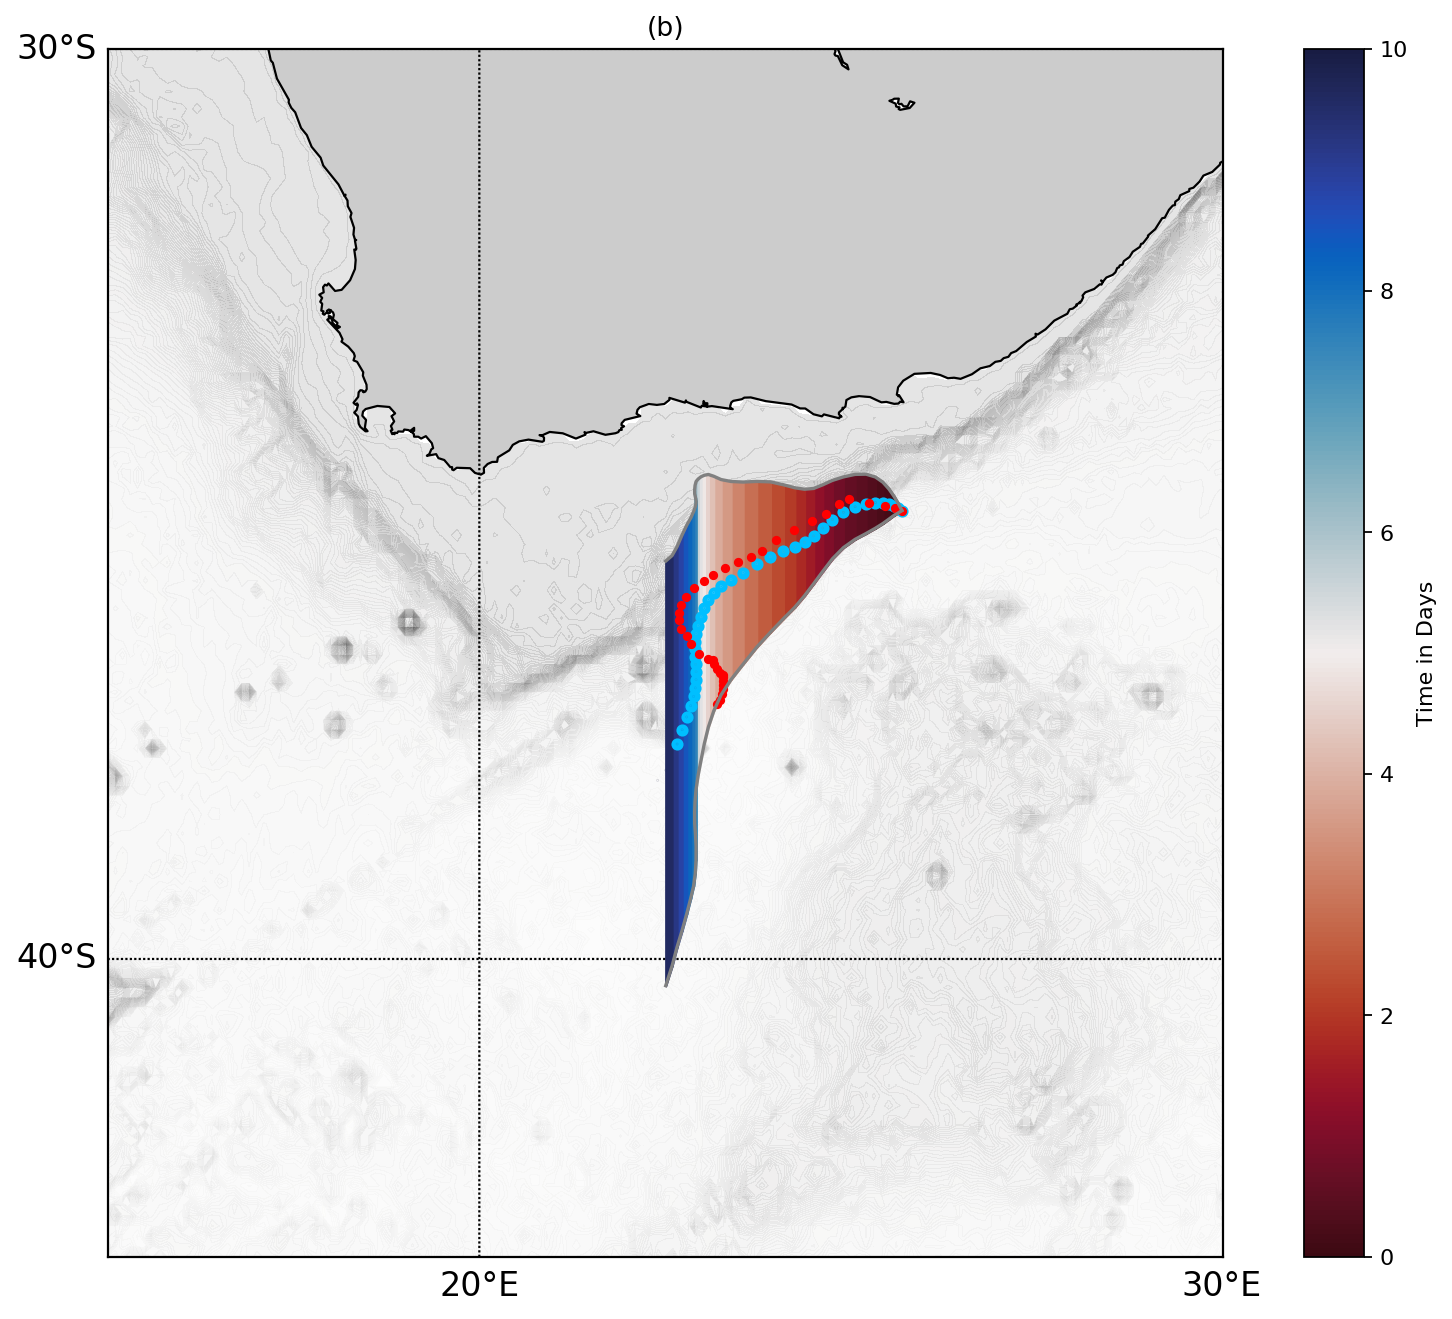

In [18]:
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas
import matplotlib as mpl

cmap = cm.cm.balance

drift = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_109207", sep="\t")

diff = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Test_Drift.txt", sep = "\t")

tset = "/Users/hart-davis/Desktop/Scripts/Drift_example2.nc"
ts = netCDF4.Dataset(tset)

llon = diff.Lon.values
llat = diff.Lat.values
loni = ts.variables["lon"][:]
lati = ts.variables["lat"][:]

date = ts.variables["time"][0]
d = date - 630720000
a = (d.data-d.data[0])/3600/24
a = np.array(a)

mlon = diff.Lon.values
mlat = diff.Mlat.values

nlon = diff.Lon.values
nlat = diff.Nlat.values

dlon = drift.lon.values[9:49]
dlat = drift.lat.values[9:49]
silon = drift.lon.values[9:49]
silat = drift.lat.values[9:49]
slon = silon[0]
slat = silat[0]

blon = diff.Blon.values

m = Basemap(projection = "merc", resolution="i",llcrnrlon = 15, 
            llcrnrlat = -43, urcrnrlon = 30, urcrnrlat = -30,lat_0= -20,lon_0 = 0)

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

xx, yy = m(*np.meshgrid(lon,lat))
si1,si2 = m(silon,silat)
s1,s2 = m(llon,llat)
a1,a2 = m(nlon,nlat)
b1,b2 = m(mlon,mlat)
f1,f2 = m(loni,lati)
c1,c2 = m(blon,nlat)

npts = 40
x = b1[:]
y = b2[:]
z = a2[:]
normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

figure1 = figure(figsize=(13, 10), dpi=160, facecolor='w', edgecolor='k')

for i in range(npts - 1):
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]],[z[i], z[i+1]], color=cmap(normalize(z[i])),alpha=1,zorder=3)
cntour = m.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.1,zorder=1)

ax = m.scatter(s1[:-2],s2[:-2],20,color="deepskyblue", marker = "o", alpha = 1,zorder=3)
at = m.scatter(f1,f2,0.01, c=a,cmap=cm.cm.balance_r, marker = ".", alpha = 1, zorder=3)

cbar = plt.colorbar(at)
cbar.set_label("Time in Days")

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

m.scatter(si1[2:40],si2[2:40],10,marker = "o", color="red",alpha = 1,zorder=3)

plt.title("(b)")
plt.plot(x[:40], y[:40], color="gray",zorder=3)
plt.plot(x[:40], z[:40], color="gray",zorder=3)
plt.show()

In [2]:
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas

globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

diff = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Test_Drift.txt", sep = "\t")

tset = "/Users/hart-davis/Desktop/Scripts/Drift_example3.nc"
ts = netCDF4.Dataset(tset)
drift = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Simulations/Drifter_109207", sep="\t")

loni = ts.variables["lon"][:,:]
lati = ts.variables["lat"][:,:]
date = ts.variables["time"][0]
d = date - 630720000
a = (d.data-d.data[0])/3600/24
a = np.array(a)

mlon = diff.Lon.values
mlat = diff.Mlat.values

nlon = diff.Lon.values
nlat = diff.Nlat.values

silon = loni[0]
silat = lati[0]

dlon = drift.lon.values[9:129]
dlat = drift.lat.values[9:129]
silon = drift.lon.values[9:129]
silat = drift.lat.values[9:129]

m = Basemap(projection = "merc", resolution="i",llcrnrlon = 15, 
            llcrnrlat = -43, urcrnrlon = 30, urcrnrlat = -30,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
#m.pcolor(lonData, latData, U, V)
#cbar = m.colorbar()
#cbar.ax.set_ylabel('Current speed in ' + units)
si1,si2 = m(silon,silat)
s1,s2 = m(loni,lati) 
a1,a2 = m(nlon,nlat)
b1,b2 = m(mlon,mlat)
xx, yy = m(*np.meshgrid(lon,lat))
#f1,f2 = m(dlon,dlat)
#latdata, londata = np.meshgrid(latData,lonData)
#latD, lonD = m(latdata, londata)

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/hart-davis/anaconda2/lib/python2.7/site

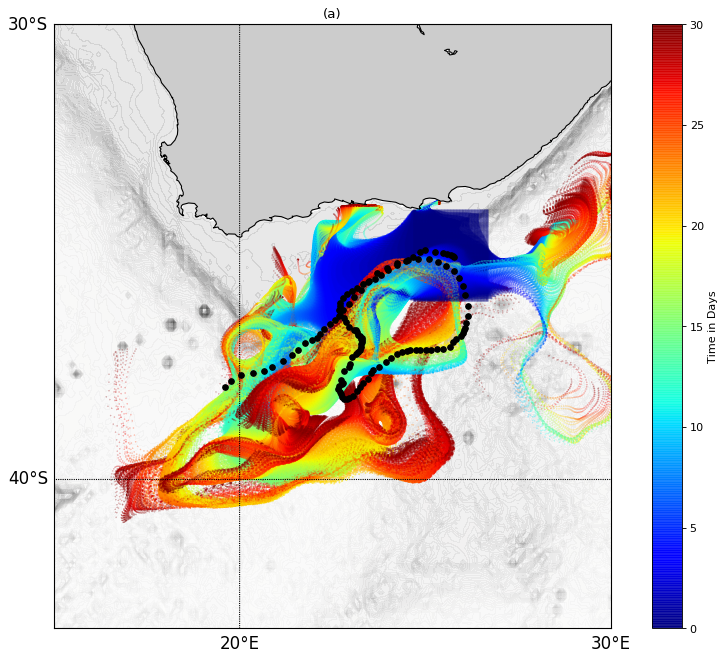

In [3]:
cntour = m.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,1,100),alpha=0.091,zorder=1)

m.drawcoastlines()

m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

#m.scatter(b1,b2,10,marker = ".", color="black",alpha = 1)
m.scatter(si1,si2,100,marker = ".", color="black",alpha = 1,zorder=3)
for xrr in range(0,len(loni)):
    at = m.scatter(s1[xrr,:],s2[xrr,:],0.1, c=a,cmap='jet', marker = ".", alpha = 0.9)
    
#m.scatter(f1,f2,100,marker = ".", color="black",alpha = 1,zorder=3)

cbar = plt.colorbar(at)
cbar.set_label("Time in Days")

plt.title("(a)")
plt.show()